# SCRIPT DESCRIPTION

# IMPORTING LIBRARIES

In [1]:
# Please check to ensure that all of the libraries imported in functions_speller_analysis_simulated.py are installed
# in your environment or in the same file pathway. 
import functions_speller_analysis_online_detections
import shutil

# SAVING A BACKUP OF THIS SCRIPT

In [2]:
# Creating the original and target file directories.
original = r'/home/dan/Projects/PseudoOnlineTests_for_RTCoG/Scripts/Recent/SpellerAnalysis/speller_analysis_online_click_detections.ipynb'
target   = r'/mnt/shared/danprocessing/BACKUP/Projects/PseudoOnlineTests_for_RTCoG/Scripts/SpellerAnalysis/speller_analysis_online_click_detections.ipynb'

# Saving.
shutil.copyfile(original, target)

'/mnt/shared/danprocessing/BACKUP/Projects/PseudoOnlineTests_for_RTCoG/Scripts/SpellerAnalysis/speller_analysis_online_click_detections.ipynb'

# INPUTTING PARAMETERS

In [3]:
"""
DESCRIPTION:
Please input the parameters below.
"""

# EXPERIMENTER INPUTS:
block_id          = 'Block1'
date              = '2023_01_06'
dir_intermediates = '/mnt/shared/danprocessing/Projects/PseudoOnlineTests_for_RTCoG/Intermediates/'
patient_id        = 'CC01'
task              = 'Speller' 

"""
INPUT VARIABLES:
block_id:          [String (BlockX, where X is an int))]; Block ID of the task that was run.
date:              [string (YYYY_MM_DD)]; Date on which the block was run.
dir_intermediates: [string]; Intermediates directory where relevant information is stored.
patient_id:        [string]; Patient ID PYyyNnn or CCxx format, where y, n, and x are integers.
task:              [string]; Type of task that was run.
""";

# LOADING MEDIAPIPE HAND LANDMARK TRAJECTORIES

In [4]:
"""
DESCRIPTION:
Importing the xarray of hand trajectories. Note that these were previously curtailed according to the true
block starting and ending times (see curtailing_video_data.ipynb). The hand trajectories array is loaded 
from:

dir_intermediates + patient_id + '/' + task + '/HandTrajectories/'  + date + '/Curtailed/ + 'date + '_' + block_id + '_hand_trajectories.nc'

Feel free to modify the pathway in which these starting and ending points are stored and the necessary experimenter
inputs appropriately.

INPUT VARIABLES:
block_id:          [String (BlockX, where X is an int))]; Block ID of the task that was run.
date:              [string (YYYY_MM_DD)]; Date on which the block was run.
dir_intermediates: [string]; Intermediates directory where relevant information is stored.
patient_id:        [string]; Patient ID PYyyNnn or CCxx format, where y, n, and x are integers.
task:              [string]; Type of task that was run.

OUTPUT VARIABLES:
hand_trajectories: [xarray (landmarks x time samples) > floats]; The time traces of the x- and y-coordinates 
                   for each landmark. The time domain is in units of seconds. 
"""

# COMPUTATION:

# Loading the hand trajectories.
hand_trajectories = functions_speller_analysis_online_detections.load_hand_trajectories(block_id, date, dir_intermediates,\
                                                                                        patient_id, task)
  

HAND TRAJECTORIES ARRAY
<xarray.DataArray (landmarks: 42, time_seconds: 26846)>
array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.10574713, -0.10804598, -0.10550459, ..., -0.117506  ,
        -0.12019231, -0.12348668],
       ...,
       [ 0.58850575,  0.5908046 ,  0.59174312, ...,  0.61390887,
         0.61778846,  0.61985472],
       [ 0.48045977,  0.48275862,  0.47706422, ...,  0.45323741,
         0.45192308,  0.45520581],
       [ 0.69885057,  0.70114943,  0.70183486, ...,  0.72661871,
         0.73317308,  0.73607748]])
Coordinates:
  * landmarks     (landmarks) object 'WRIST_x' 'WRIST_y' ... 'PINKY_TIP_y'
  * time_seconds  (time_seconds) float64 31.67 31.7 31.73 ... 926.4 926.5 926.5

HAND LANDMARKS LIST:
['WRIST_x',
 'WRIST_y',
 'THUMB_CMC_x',
 'THUMB_CMC_y',
 'THUMB_MCP_x',
 'THUMB_MCP_y',
 'THUMB_IP_x',
 'THUMB_IP_y',

# LOADING CLICK INFORMATION

In [5]:
"""
DESCRIPTION:
Loading the click information dictionary. Note that these arrays were  previously curtailed according to
the true block starting and ending times (see curtailing_video_data.ipynb). The click arrays are loaded 
from:

dir_intermediates + patient_id + '/' + task + '/ClickDetections/'  + date + '/Curtailed/' + date + '_' + block_id + '_click_highlights'

Feel free to modify the pathway in which these starting and ending points are stored and the necessary experimenter
inputs appropriately.

INPUT VARIABLES:
block_id:          [String (BlockX, where X is an int))]; Block ID of the task that was run.
date:              [string (YYYY_MM_DD)]; Date on which the block was run.
dir_intermediates: [string]; Intermediates directory where relevant information is stored.
patient_id:        [string]; Patient ID PYyyNnn or CCxx format, where y, n, and x are integers.
task:              [string]; Type of task that was run.

OUTPUT VARIABLES:
click_info: [dict (key: string ('backspace','keyboard','stimcolumn'); Value: xarray (1 x time samples) > strings)]; For each 
            time sample of the array of each key there is a 'no_click' or a string specific to that array. For example, the
            'backspace' key of the dictionary has an array where each element is a string named either 'no_click' or 
            'backspace_click'. The 'backspace_click' elements do not occur consecutively and describe the instance a 
            click on the backspace key occured. For the 'keyboard' and 'stimcolumn' keys, similar rules apply. Time dimension
            is in units of s.
"""

# COMPUTATION:

# Loading the click information.
click_info = functions_speller_analysis_online_detections.load_click_information(block_id, date, dir_intermediates,\
                                                                                 patient_id, task)


# PLOTTING UPPER-LIMB TRAJECTORIES AND CLICK ACTIVITY FROM PARTICIPANT'S MONITOR

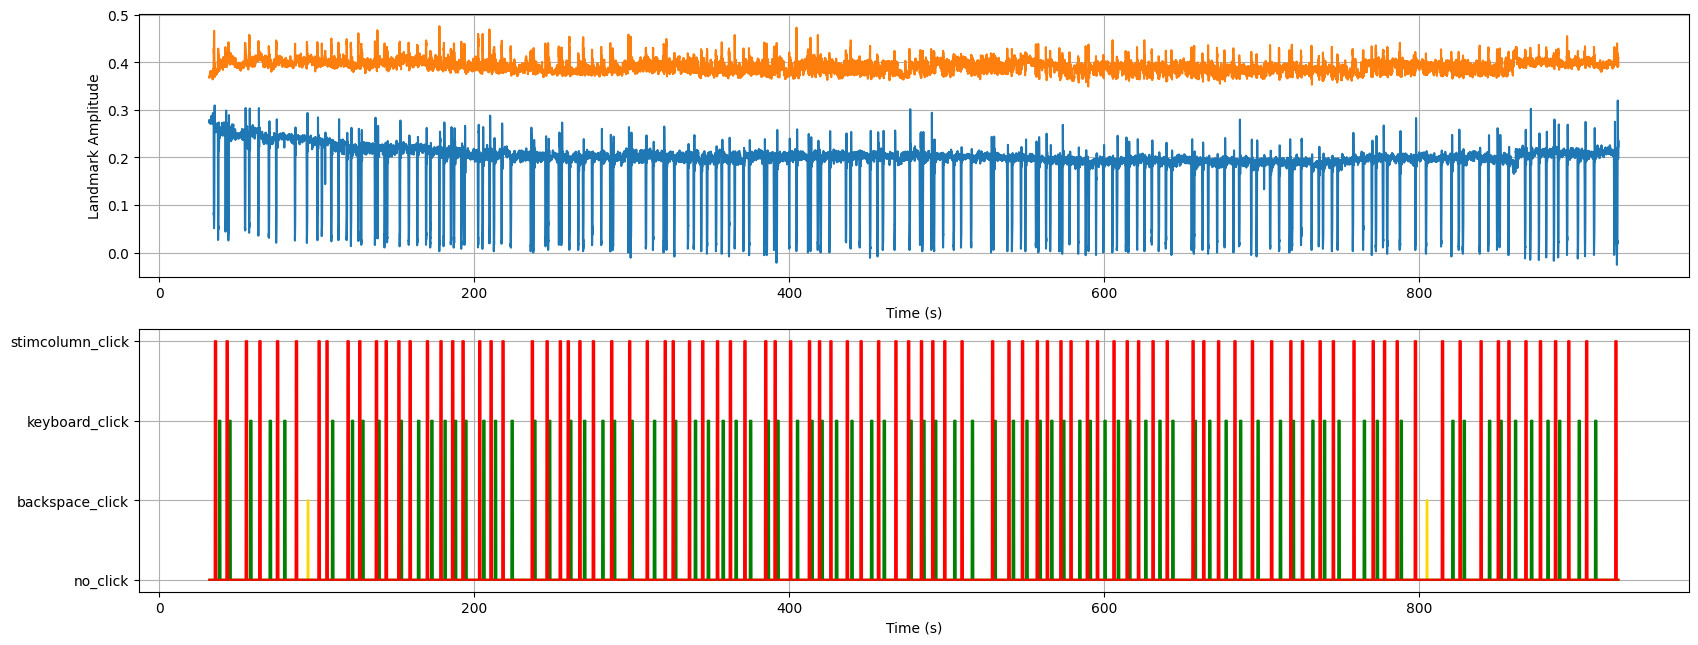

In [6]:
"""
DESCRIPTION:
The experimenter can choose to display whichever set of the above-displayed hand landmarks and inputs these into the 
landmark_trajectories_plotting list.
"""

# EXPERIMENTER INPUTS:
landmark_trajectories_plotting = ['MIDDLE_FINGER_TIP_x', 'THUMB_MCP_y']

"""
INPUT VARIABLES:
click_info:                     [dict (key: string ('backspace','keyboard','stimcolumn'); Values: below)];
    data:                       [xarray (1 x time samples) > strings];  For each  time sample of the array of each key there
                                is a 'no_click' string or a click-string specific to that xarray. For example, the 'backspace'
                                key of the dictionary has an array where each element is a string named either 'no_click' or 
                                'backspace_click'. The 'backspace_click' elements do not occur consecutively and describe the 
                                instance a click on the backspace key occured. For the 'keyboard' and 'stimcolumn' keys, similar
                                rules apply. Time dimension is in units of s.
    plotcolor:                  [string]; Color corresponding to the type of click for plotting.
hand_trajectories:              [xarray (landmarks x time samples) > floats]; The time traces of the x- and y-coordinates 
                                for each landmark. The time domain is in units of seconds. 
landmark_trajectories_plotting: [list > strings]; Possible landmarks to display.
"""

# COMPUTATION:

# Plotting hand landmarks and click information.
functions_speller_analysis_online_detections.plotting_landmarks_and_clicks(click_info, hand_trajectories,\
                                                                           landmark_trajectories_plotting)


# REFERENCING HAND TRAJECTORY DATA TO PINKY AND THUMB LANDMARKS

In [7]:
"""
DESCRIPTION:
Each hand landmark is referenced according to experimenter-specified landmarks. Make sure that the landmarks that are
selected will not be used for further analysis as they will get normalized out to 0.
"""

# EXPERIMENTER INPUT:
ref1_x = 'PINKY_MCP_x'
ref2_x = 'THUMB_MCP_x'
refa_y = 'THUMB_MCP_y'
refb_y = 'THUMB_TIP_y'

"""
INPUT VARIABLES:
hand_trajectories: [xarray (landmarks x time samples) > floats]; The time trajectories of the x- and y-coordinates for each
                   landmark. The time domain is in units of seconds. 
ref1_x:            [string]; First horizontal reference landmark
ref2_x:            [string]; Second horizontal reference landmark
refa_y:            [string]; First vertical reference landmark
refb_y:            [string]; Second vertical reference landmark

OUTPUT VARIABLES:
hand_trajectories_ref: [xarray (landmarks x time samples) > floats]; The trajectories of the x- and y-coordinates for each
                       landmark. These are referenced in the x- and y-dimensions according to the reference landmarks. The
                       time domain is in units of seconds. 
"""

# COMPUTATION:

# Normalizing hand trajectories.
hand_trajectories_ref = functions_speller_analysis_online_detections.referencing_hand_trajectories(hand_trajectories, ref1_x, ref2_x,\
                                                                                                   refa_y, refb_y)


# PLOTTING REFERENCED UPPER-LIMB TRAJECTORIES AND CLICK ACTIVITY FROM PARTICIPANT'S MONITOR

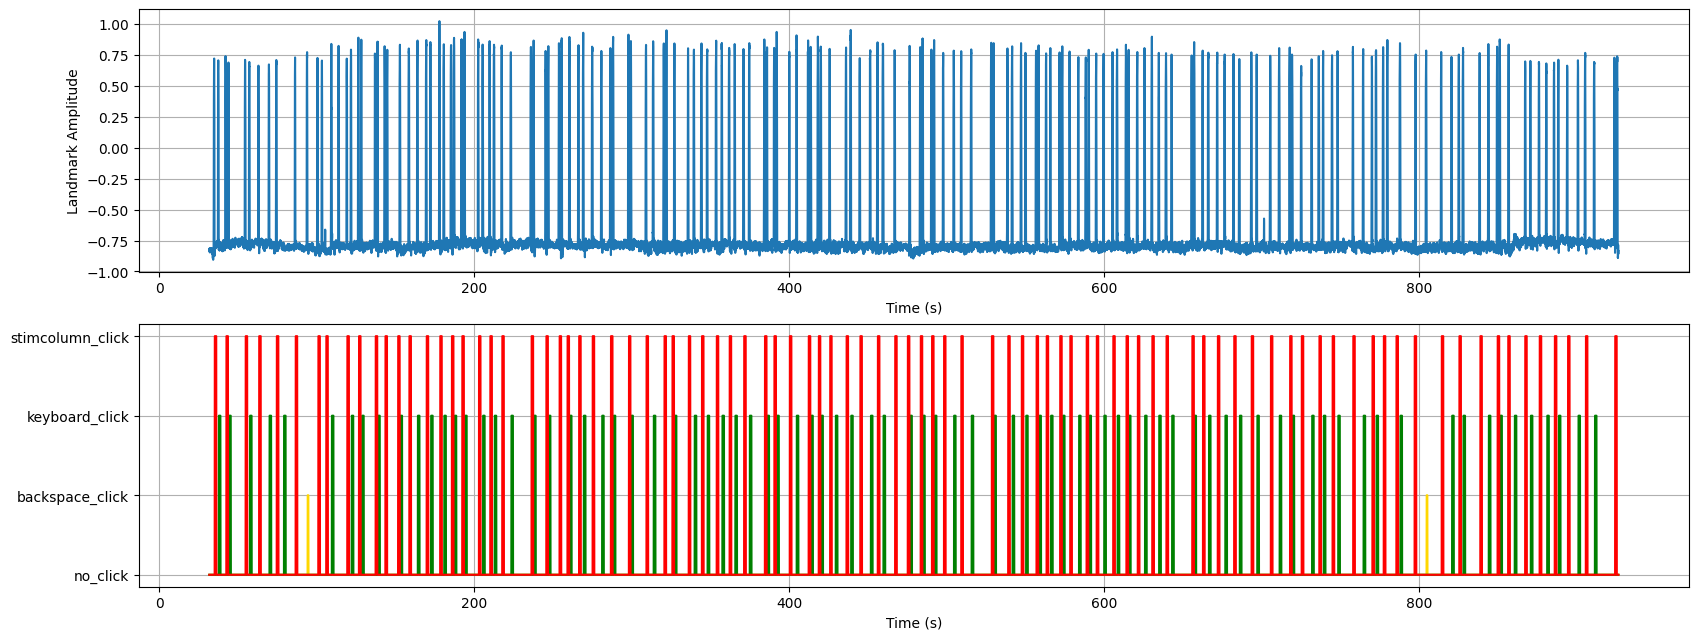

In [8]:
"""
DESCRIPTION:
The experimenter can choose to display whichever set of the above-displayed hand landmarks and inputs these into the 
landmark_trajectories_plotting list.
"""

# EXPERIMENTER INPUTS:
landmark_trajectories_plotting = ['MIDDLE_FINGER_TIP_y']

"""
INPUT VARIABLES:
click_info:                     [dict (key: string ('backspace','keyboard','stimcolumn'); Values: below)];
    data:                       [xarray (1 x time samples) > strings];  For each  time sample of the array of each key there
                                is a 'no_click' string or a click-string specific to that xarray. For example, the 'backspace'
                                key of the dictionary has an array where each element is a string named either 'no_click' or 
                                'backspace_click'. The 'backspace_click' elements do not occur consecutively and describe the 
                                instance a click on the backspace key occured. For the 'keyboard' and 'stimcolumn' keys, similar
                                rules apply. Time dimension is in units of s.
    plotcolor:                  [string]; Color corresponding to the type of click for plotting.
hand_trajectories_ref:          [xarray (landmarks x time samples) > floats]; The trajectories of the x- and y-coordinates
                                for each landmark. These are referenced in the x- and y-dimensions according to the reference
                                landmarks. The time dimension is in units of seconds. 
landmark_trajectories_plotting: [list > strings]; Possible landmarks to display.
"""

# COMPUTATION:

# Plotting hand landmarks and click information.
functions_speller_analysis_online_detections.plotting_landmarks_and_clicks(click_info, hand_trajectories_ref,\
                                                                           landmark_trajectories_plotting)


# EXTRACTING ONLY RELEVANT TRAJECTORIES

In [9]:
"""
DESCRIPTION:
For each movement type, the experimenter enters the most relevant hand landmarks for visualization. The experimenter
creates a relevant_hand_landmarks dictionary where the keys of the dictionary are the possible movement classes and
the value for each key is a list of the most relevant hand landmarks to that class. The plotting cells above should
be used to determine these landmarks. Then for each movement type a dictionary, hand_trajectories_relevant is created
where for each movement, only the relevant hand trajectories are stored.
"""

# EXPERIMENTER INPUTS:
relevant_hand_landmarks = {
                           'grasp': ['MIDDLE_FINGER_MCP_x',\
                                     'MIDDLE_FINGER_MCP_y',\
                                     'MIDDLE_FINGER_PIP_x',\
                                     'MIDDLE_FINGER_PIP_y',\
                                     'MIDDLE_FINGER_DIP_x',\
                                     'MIDDLE_FINGER_DIP_y',\
                                     'MIDDLE_FINGER_TIP_x',\
                                     'MIDDLE_FINGER_TIP_y',\
                                     'RING_FINGER_MCP_x',\
                                     'RING_FINGER_MCP_y',\
                                     'RING_FINGER_PIP_x',\
                                     'RING_FINGER_PIP_y',\
                                     'RING_FINGER_DIP_x',\
                                     'RING_FINGER_DIP_y',\
                                     'RING_FINGER_TIP_x',\
                                     'RING_FINGER_TIP_y']
                            }

"""
INPUT VARIABLES:
hand_trajectories_ref:   [xarray (landmarks x time samples) > floats]; The trajectories of the x- and y-coordinates
                         for each landmark. These are referenced in the x- and y-dimensions according to the reference
                         landmarks. The time dimension is in units of seconds. 
relevant_hand_landmarks: [dictionary (key: string (movement type); Value: list > strings (hand landmarks))]; Each
                         movement holds a list of the most useful landmarks used to detect the corresponding 
                         movement type.
                         
OUTPUT VARIABLES:
hand_trajectories_relevant: [dictionary (Key: string (movement type); Value: xarray (relevant landmarks x time samples)
                            > floats]; For each movement type, only the relevant hand trajectories are stored. The time
                            dimension of each xarray is in units of s.
                         
"""

# COMPUTATION:

# Extracting only the relevant hand trajectories for each movement.
hand_trajectories_relevant = functions_speller_analysis_online_detections.extracting_relevant_trajectories(hand_trajectories_ref,\
                                                                                                           relevant_hand_landmarks)


# UPLOADING DICTIONARY WITH MOVEMENT ONSET/OFFSET TIMES

In [10]:
"""
DESCRIPTION:
The dictionary containing the movement onset and offset times for each movement type will be uploaded if it exists. 
This dictionary would contain the previously saved movement onset/offset times for each movement. If there were no
previously saved onset/offset times for a particular movement (or all movements) a dictionary will be initiated and
saved for current and future inputting of onset/offset times. If it exists, the dictionary is loaded from:

dir_intermediates + patient_id + '/' + task + '/MovementOnsetsAndOffsets/' + date + '/' + 'dict_OnsetOffset_' + block_id

Feel free to modify the pathway in which this movement onset/offset dictionary is stored and modify the necessary
experimenter inputs appropriately.

INPUT VARIABLES:
block_id:          [String (BlockX, where X is an int))]; Block ID of the task that was run.
date:              [string (YYYY_MM_DD)]; Date on which the block was run.
dir_intermediates: [string]; [string]; Intermediates directory where relevant information is stored.
patient_id:        [string]; Patient ID PYyyNnn or CCxx format, where y, n, and x are integers.
task:              [string]; Type of task that was run.

OUTPUT VARIABLES:
movement_onsetsoffsets: [dictionary (key: string (movement); Value: list > list [t_onset, t_offset] > floats)]; The 
                        dictionary containing all movement onset and offset times for each movement type.
"""

# Uploading the dictionary with movement onset and offsets.
movement_onsetsoffsets = functions_speller_analysis_online_detections.upload_movement_onsetsoffsets(block_id, date, dir_intermediates,\
                                                                                                    patient_id, task)


{'grasp': [[34.43333333333334, 34.93333333333333],
           [37.1, 37.6],
           [41.733333333333334, 42.266666666666666],
           [43.56666666666667, 44.06666666666666],
           [54.1, 54.699999999999996],
           [56.766666666666666, 57.33333333333333],
           [62.6, 63.13333333333333],
           [69.26666666666667, 69.8],
           [73.93333333333334, 74.46666666666667],
           [85.83333333333333, 86.33333333333333],
           [93.43333333333334, 93.96666666666667],
           [100.06666666666666, 100.63333333333333],
           [102.9, 103.39999999999999],
           [105.13333333333334, 105.39999999999999],
           [108.83333333333333, 109.53333333333333],
           [113.46666666666667, 114.0],
           [118.7, 119.2],
           [121.36666666666667, 121.86666666666666],
           [125.96666666666667, 126.63333333333333],
           [127.9, 128.43333333333334],
           [136.63333333333333, 137.16666666666666],
           [138.2, 138.766666666666

# ZOOMING IN

Movement:  grasp

Movement Onset Times:  [100.06666666666666, 102.9, 105.13333333333334, 108.83333333333333, 113.46666666666667, 118.7]
Movement Onset Inds:  [11, 12, 13, 14, 15, 16]

Movement Offset Times:  [100.63333333333333, 103.39999999999999, 105.39999999999999, 109.53333333333333, 114.0, 119.2]
Movement Offset Inds:  [11, 12, 13, 14, 15, 16]


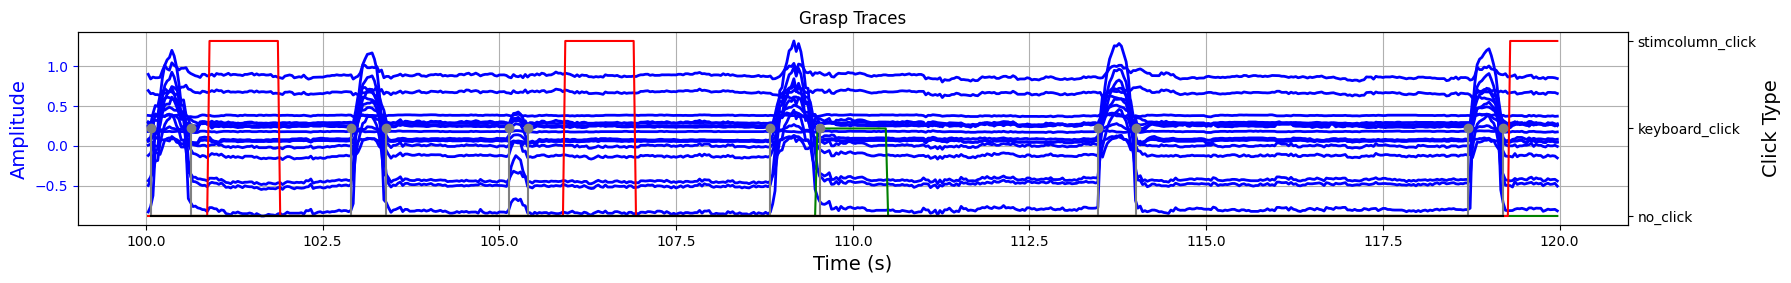

In [11]:
"""
DESCRIPTION:
The experimenter inputs a start and an end time between which to zoom in to view the relevant hand trajectories
for each movement and click information. The hand landmark trajectories are shown for each movement in a 
separate plot and should be used to inform determining the movement onset and offset times. If there already
exists in the movement onset/offset times dictionary onset and offset times within the zoomed-in region for a 
particular movement, these will also be displayed as well as their numerical cardinality (as a list).
"""

# EXPERIMENTER INPUTS:
movement_colors = {'grasp': 'blue'}
t_start_zoom    = 100
t_end_zoom      = 120

"""
INPUT VARIABLES:
click_info:                 [dict (key: string ('backspace','keyboard','stimcolumn'); Values: below)];
    data:                   [xarray (1 x time samples) > strings];  For each  time sample of the array of each key there
                            is a 'no_click' string or a click-string specific to that xarray. For example, the 'backspace'
                            key of the dictionary has an array where each element is a string named either 'no_click' or 
                            'backspace_click'. The 'backspace_click' elements do not occur consecutively and describe the 
                            instance a click on the backspace key occured. For the 'keyboard' and 'stimcolumn' keys, similar
                            rules apply. Time dimension is in units of s.
    plotcolor:              [string]; Color corresponding to the type of click for plotting.
hand_trajectories_relevant: [dictionary (Key: string (movement type); Value: xarray (relevant landmarks x time samples)
                            > floats]; For each movement type, only the relevant hand trajectories are stored. The time
                            dimension of each xarray is in units of s.
movement_colors:            [dictionary (key: string (movement); Value: string (color))]; There is a color associated
                            with each movement for plotting.
movement_onsetsoffsets:     [dictionary (key: string (movement); Value: list > list [t_onset, t_offset] > floats)]; The 
                            dictionary containing all movement onset and offset times for each movement type.
t_end_zoom:                 [int (units: s)]; The ending time point for the zoomed in window. To set as the last time
                            point, leave as empty list [].
t_start_zoom:               [int (units: s)]; The starting time point for the zoomed in window. To set as the first
                            time point, leave as empty list [].    
""";

# Zooming in to the experimenter-specified region.
functions_speller_analysis_online_detections.zooming_in(click_info, hand_trajectories_relevant, movement_colors,\
                                                        movement_onsetsoffsets, t_end_zoom, t_start_zoom)


# COMBINING ALL THREE TYPES OF CLICKS INTO ONE ARRAY

In [12]:
"""
DESCRIPTION:
Combining all click types into one array.

INPUT VARIABLES:
click_info:    [dict (key: string ('backspace','keyboard','stimcolumn'); Values: below)];
    data:      [xarray (1 x time samples) > strings];  For each  time sample of the array of each key there
               is a 'no_click' string or a click-string specific to that xarray. For example, the 'backspace'
               key of the dictionary has an array where each element is a string named either 'no_click' or 
               'backspace_click'. The 'backspace_click' elements do not occur consecutively and describe the 
               instance a click on the backspace key occured. For the 'keyboard' and 'stimcolumn' keys, similar
               rules apply. Time dimension is in units of s.
    plotcolor: [string]; Color corresponding to the type of click for plotting.

OUTPUT VARIABLES:
clicks_combined: [xarray (1 x N frames)> strings ('nothing'/'click')]; Xarray containing click information 
                 from all click types.
"""

# COMPUTATION:

# Combining clicks.
clicks_combined = functions_speller_analysis_online_detections.combining_clicks(click_info)


# EXTRACTING CLICK ONSETS

In [13]:
"""
DESCRIPTION:
Producing the arrays of command onsets and offsets.

INPUT VARIABLES:
click_trace: [xarray > strings)]; for each time sample at the video resolution, there exists a click or 
             no-click entry. Time dimension is in units of seconds at video resolution.

NECESSARY FUNCTIONS:
unique_value_index_finder

OUTPUT VARIABLES:
t_click_onsets:  [array > floats (units: s)]; The times the click changes from 0 to 1. 
"""

# COMPUTATION:

# Extracting the click onset times.
t_click_onsets, _ = functions_speller_analysis_online_detections.extracting_click_onset_offset_times(clicks_combined)


# COMPUTING LATENCIES AND TRUE POSITIVES

Miss:  102.9
Miss:  113.467
Miss:  144.333
Miss:  255.033
Miss:  321.567
Miss:  779.4
Miss:  797.333
Miss:  925.4
N grasps:  176
N clicks:  168
Sensitivity:  95.45
Mean Latency to Command:  0.69
Stdev Latency to Command:  0.109


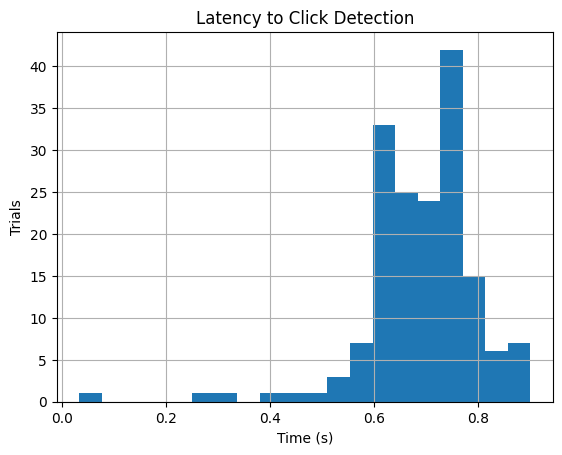

In [14]:
"""
DESCRIPTION:
Computing the latency from movement onset to click and the resulting sensitivity. The sensitivity is defined
as the number of true positives over the number of all click detectiosn, where a true positive must occur 
within the experimenter-defined time post-movement onset.
"""
# EXPERIMENTER INPUTS:
movement               = 'grasp'
t_after_movement_limit = 1.5

"""
INPUT VARIABLES:
movement:               [string]; The movement from which the onsets and offsets will be extracted.
movement_onsetsoffsets: [dictionary (key: string (movement); Value: list > list [t_onset, t_offset] > floats)]; The 
                        dictionary containing all movement onset and offset times for each movement type.
patient_id:             [string]; Patient ID PYyyNnn or CCxx format, where y, n, and x are integers.
t_after_movement_limit: [float (unit: s)]; Amount of time from movement onset that can pass for a click to occur 
                        and be associated with the movement onset.
t_click_onsets:         [array > floats (units: s)]; The times the click changes from 0 to 1.

OUTPUT VARIABLES:
n_clicks:          [int]; Number of detected clicks.
t_click_latencies: [array > floats (units: s)]; Latencies of all detected clicks relative to corresponding
                   movement onset.
"""
    
# COMPUTATION:

# Computing total number of clicks and click latencies.
n_clicks,\
t_click_latencies = functions_speller_analysis_online_detections.computing_latency_and_tp(movement, movement_onsetsoffsets,\
                                                                                          patient_id, t_after_movement_limit,\
                                                                                          t_click_onsets);


# SAVING CLICK LATENCIES

In [15]:
# """
# DESCRIPTION:
# Saving click latencies for this block to array of latencies from all other blocks recorded on the current 
# date. This is for computing across-block error for average mean latencies. Latencies are saved in the
# following pathway:

# dir_intermediates + patient_id + '/Speller/ClickLatencies/Simulated/' + date + '/' + date + '_' + block_id 
# + '_click_latencies.txt'

# INPUT VARIABLES:
# block_id:          [String]; Block ID of the task that was run. Should be format 'Block#'.
# date:              [string (YYYY_MM_DD)]; Date on which the current block was run.
# dir_intermediates: [string]; [string]; Intermediates directory where relevant information is stored.
# movement:          [string]; The movement from which the onsets and offsets will be extracted.
# patient_id:        [string]; Patient ID PYyyNnn or CCxx format, where y, n, and x are integers.
# t_click_latencies: [array > floats (units: s)]; Latencies of all detected clicks relative to corresponding
#                    movement onset.
# task:              [string]; Type of task that was run.
# """

# # COMPUTATION:

# # Saving the click latencies.
# functions_speller_analysis_online.saving_click_latencies(block_id, date, dir_intermediates, movement,\
#                                                          patient_id, t_click_latencies, task)

# COMPUTING FALSE POSITIVES

In [16]:
"""
DESCRIPTION:
Counting the number of clicks that occur without any corresponding movement (outside the click limit window).

INPUT VARIABLES:
movement:               [string]; The movement from which the onsets and offsets will be extracted.
movement_onsetsoffsets: [dictionary (key: string (movement); Value: list > list [t_onset, t_offset] > floats)]; The 
                        dictionary containing all movement onset and offset times for each movement type.
t_after_movement_limit: [float (unit: s)]; Amount of time from movement onset that can pass for a click to occur 
                        and be associated with the movement onset.
t_click_onsets:         [array > floats (units: s)]; The times the click changes from 0 to 1. 

OUTPUT VARIABLES:
n_fp: [int]; Total number of false positives for the current block of the session.
"""

# COMPUTATION:

# Computing false positives
n_fp = functions_speller_analysis_online_detections.computing_fp(movement, movement_onsetsoffsets, t_after_movement_limit,\
                                                                 t_click_onsets)


False Positives?
79.1
151.57
259.13
325.77
429.5
475.23
785.53
797.1
860.7
